Angela Diaz |
ANA675 Neural Networks & Deep Learning |
Week 3 Assignment 1 |
7/25/2024

# Show why CNN is preferred over ANN for image classification.

In [1]:
# Import Packages
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

## Load Data

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 12s 0us/step


## EDA

In [4]:
# Training Data Shape
X_train.shape

(50000, 32, 32, 3)

In [5]:
# Training Label Shape
y_train.shape

(50000, 1)

In [6]:
# Test data shape
X_test.shape

(10000, 32, 32, 3)

In [7]:
# Test Label Shape
y_test.shape

(10000, 1)

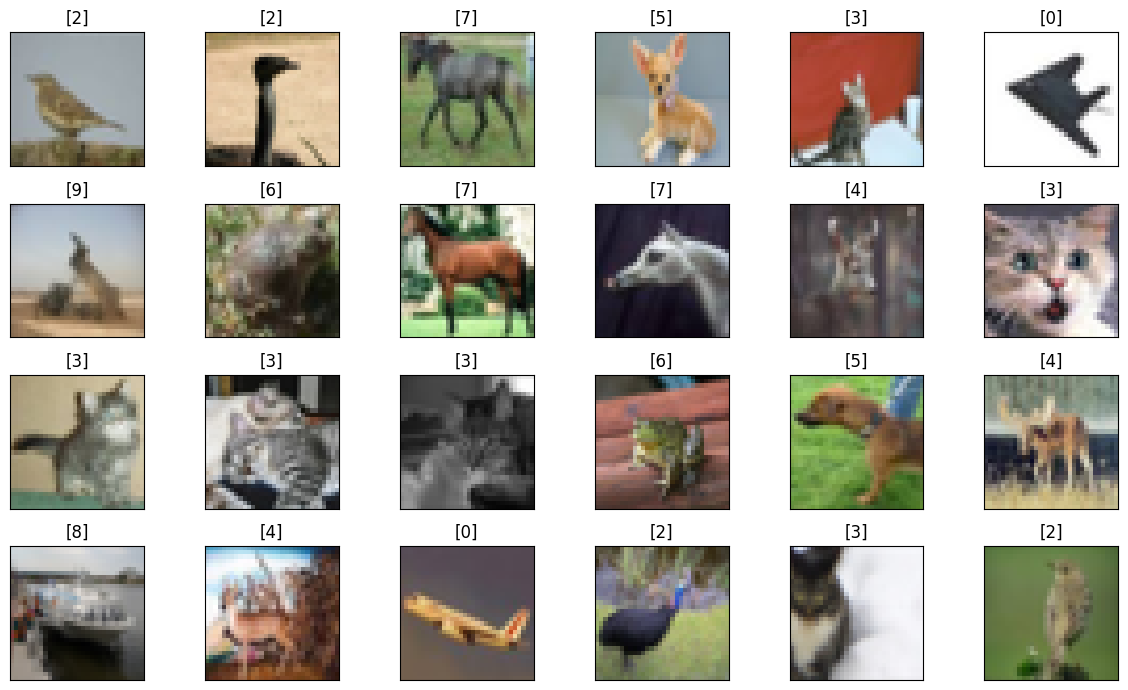

In [8]:
# Visualize images

import matplotlib.pyplot as plt
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)  # 24 indices
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(12, 7))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)

plt.tight_layout()

### Normalize the data

In [9]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

### Convert Labels to Categorical Data

In [10]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train.shape

(50000, 10)

In [11]:
y_train[0] # one sample’s categorical data

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [12]:
y_test = to_categorical(y_test)
y_test.shape

(10000, 10)

## CNN

In [13]:
from tensorflow.keras.models import Sequential
cnn = Sequential()

### Create Model

In [14]:
# Add layers to the Convelutional Layer
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

# Convelutional Layer
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))


cnn.add(MaxPooling2D (pool_size=(2, 2),))   #None stride, it will default to pool_size

# Another Convelutional layer
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

# Add another Pooling Layer
cnn.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten results
cnn.add(Flatten())

# Add Dense layer
cnn.add(Dense(units=128, activation='relu'))

# Final Out
cnn.add(Dense(units=10, activation='softmax'))

In [15]:
# Model Summary
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               5

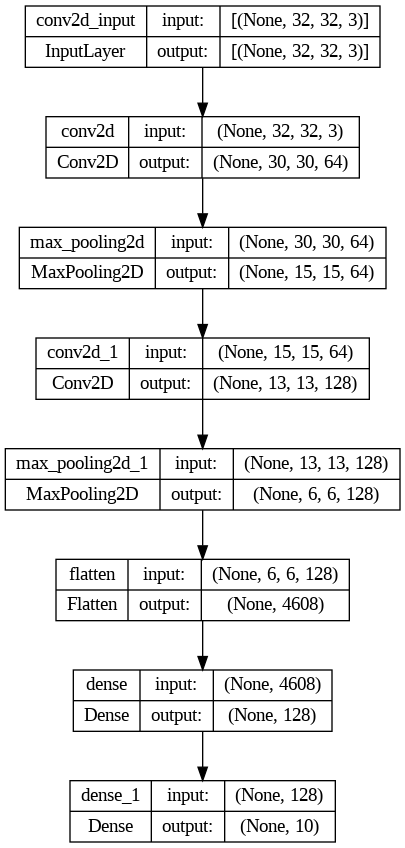

In [16]:
# Visualize Model Structure
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True,
           show_layer_names=True)
Image(filename='convnet.png')

### Compile, Train and Evaluate Model

In [17]:
# Compile Model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# Train the model
cnn.fit(X_train, y_train, epochs=3, batch_size=25, validation_split=0.1)

Epoch 1/3
1800/1800 [==============================] - 133s 73ms/step - loss: 1.4045 - accuracy: 0.5001 - val_loss: 1.1127 - val_accuracy: 0.5970
Epoch 2/3
1800/1800 [==============================] - 129s 71ms/step - loss: 1.0348 - accuracy: 0.6378 - val_loss: 1.0039 - val_accuracy: 0.6580
Epoch 3/3
1800/1800 [==============================] - 129s 72ms/step - loss: 0.8866 - accuracy: 0.6915 - val_loss: 0.8999 - val_accuracy: 0.6918


In [19]:
# Evaluate Model
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 7s 21ms/step - loss: 0.9377 - accuracy: 0.6737


In [20]:
print("The CNN Model Loss is: ", loss)
print("The CNN Model Accuracy is: ", accuracy)

The CNN Model Loss is:  0.937716007232666
The CNN Model Accuracy is:  0.6736999750137329


### Prediction

In [21]:
predictions = cnn.predict(X_test)

313/313 [==============================] - 7s 21ms/step


In [22]:
y_test[4]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [23]:
print(predictions[4])

[1.2199215e-05 4.0260500e-05 2.4144022e-02 9.9922776e-02 2.7902964e-01
 7.4406792e-03 5.8921081e-01 1.0553017e-04 8.3409846e-05 1.0709980e-05]


In [24]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.1515368698%
1: 0.0693825423%
2: 0.9604641236%
3: 81.4850509167%
4: 0.3995489329%
5: 12.3173117638%
6: 1.0791587643%
7: 0.0563229143%
8: 3.4676231444%
9: 0.0135993556%


## ANN

### Create Model

In [29]:
#Design the neural network.
ann_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(10, activation = "softmax")
])

### Compile, Train and Evaluate Model

In [30]:
# Compile the model
ann_model.compile(optimizer = Adam(learning_rate = 0.01),
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [31]:
ann_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 3000)              9219000   
                                                                 
 dense_5 (Dense)             (None, 10)                30010     
                                                                 
Total params: 9249010 (35.28 MB)
Trainable params: 9249010 (35.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
# Train the model
ann_model.fit(X_train, y_train, epochs = 3)

Epoch 1/3
1563/1563 [==============================] - 248s 158ms/step - loss: 3.1547 - accuracy: 0.2056
Epoch 2/3
1563/1563 [==============================] - 232s 148ms/step - loss: 2.0239 - accuracy: 0.2295
Epoch 3/3
1563/1563 [==============================] - 241s 154ms/step - loss: 2.0813 - accuracy: 0.1854


In [33]:
# Evaluate the model
# Evaluate Model
ann_loss, ann_accuracy = ann_model.evaluate(X_test, y_test)

print("The ANN Model Loss is: ", ann_loss)
print("The ANN Model Accuracy is: ", ann_accuracy)

313/313 [==============================] - 7s 20ms/step - loss: 2.0882 - accuracy: 0.1707
The MLP Model Loss is:  2.0881590843200684
The MLP Model Accuracy is:  0.17069999873638153


In [34]:
# Make predictions
ann_prediction = ann_model.predict(X_test)
print(ann_prediction)

313/313 [==============================] - 6s 17ms/step
[[0.05048467 0.06060944 0.1252202  ... 0.14549612 0.03355537 0.04670578]
 [0.22649734 0.32150543 0.01992432 ... 0.02618493 0.22635461 0.13766545]
 [0.22566722 0.31945878 0.02095501 ... 0.02748457 0.22403954 0.1380978 ]
 ...
 [0.03203631 0.0376652  0.12056769 ... 0.13795233 0.02023621 0.0312345 ]
 [0.03203631 0.0376652  0.12056769 ... 0.13795233 0.02023621 0.0312345 ]
 [0.03203631 0.0376652  0.12056769 ... 0.13795233 0.02023621 0.0312345 ]]


## Compare CNN and ANN

Artificial Neural Network, known as ANN, has a group of Multiple Perceptrons at each layer. The information is passed from the inputs, to the hidden layers, to the output layer. In this assignment, the ANN was set up to use one hidden layer. The accuracy result for the ANN model was only 17%.

Convolutional Neural Network, known as CNN, also uses a group of Multiple Perceptrons in addition to the convolutional layers. In this assignment, the CNN has two convulational layers along with two pooling layers. The accuracy rate for the CNN model was 67%.

Comparing the two model accuracy scores, you can easily see that CNN does better with image recognition.